In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Case when input is 1D

In [21]:
X = [[1],[2],[4],[3],[5]]
y = [2,  4,  8,   5,  10]            
X = np.array(X).reshape((len(X), 1))

Text(0, 0.5, 'y')

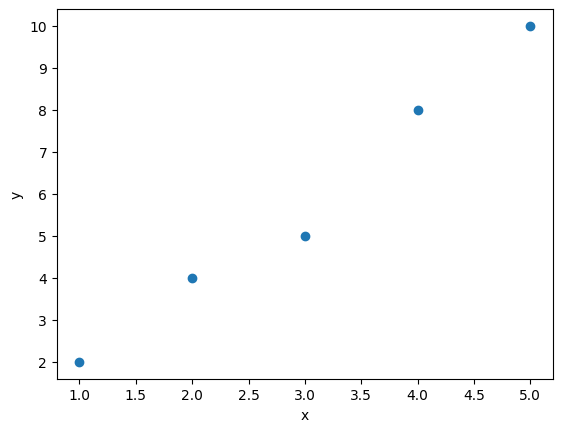

In [22]:
fig = plt.figure("Linear regression on 1 variable x: the input data")
canvas = fig.add_subplot(111)
canvas.scatter(X, y)
canvas.set_xlabel('x')
canvas.set_ylabel('y')

In [23]:
b = inv(X.T @ X) @ X.T @ y
# we also could write it as
# b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)

[1.94545455]


In [24]:
# Calculate y for each of the X's
y_predicted = X @ b
print(y_predicted)

[1.94545455 3.89090909 7.78181818 5.83636364 9.72727273]


Text(0, 0.5, 'y')

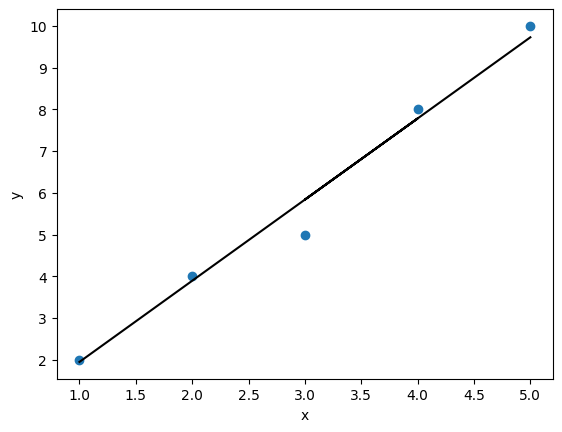

In [25]:
fig = plt.figure("Linear regression on 1 variable x: the result")
canvas = fig.add_subplot(111)
canvas.scatter(X, y)
canvas.plot(X, y_predicted, color='black')
canvas.set_xlabel('x')
canvas.set_ylabel('y')

# Case when input is 2D

In [26]:
X = [[1, 2], [1, 1], [2, 2], [3, 3], [4, 4], [5, 4], [0, 0]]
y = [  6,       2,      4,      6,     8,      9,       7]            
X = np.array(X).reshape((len(X), 2))

In [27]:
input_data = pd.DataFrame(X, columns=['x1','x2'])
input_data['y'] = pd.Series(y)

Text(0.5, 0, 'y')

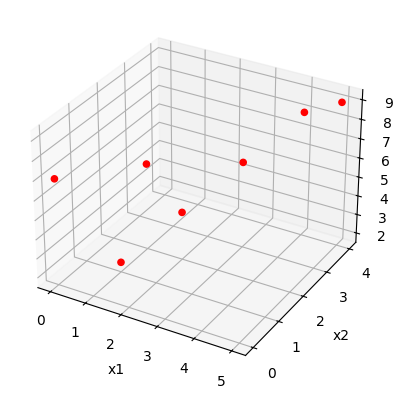

In [28]:
fig = plt.figure("Linear regression on 2 variables x_1, x_2: the input data")
canvas = fig.add_subplot(111, projection='3d')
canvas.scatter(input_data['x1'], input_data['x2'], input_data['y'], c='red', marker='o', alpha=1)
canvas.set_xlabel('x1')
canvas.set_ylabel('x2')
canvas.set_zlabel('y')

In [29]:
b = inv(X.T @ X) @ X.T @ y
print(b)

[-0.6875  2.875 ]


In [30]:
# Calculate y for each of the X's
y_predicted = X @ b
print(y)

[6, 2, 4, 6, 8, 9, 7]


In [31]:
# Create a mesh to plot the hyperplane (surface)
x1_surf, x2_surf = np.meshgrid(np.linspace(input_data.x1.min()-0.1, input_data.x1.max()+0.1, 100),
                               np.linspace(input_data.x2.min()-0.1, input_data.x2.max()+0.1, 100))
surf = pd.DataFrame({'x1': x1_surf.ravel(), 'x2': x2_surf.ravel()})
surf['y'] = np.matmul(surf.values, b)

Text(0.5, 0, 'y')

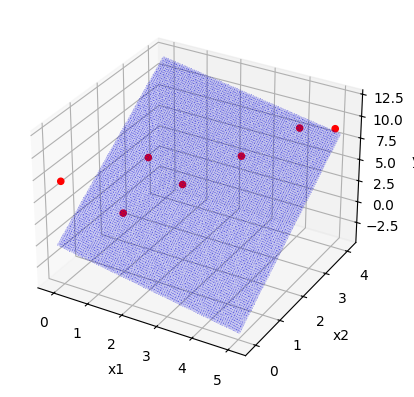

In [32]:
fig = plt.figure("Linear regression on 2 variables x_1, x_2: the result")
canvas = fig.add_subplot(111, projection='3d')
canvas.scatter(input_data['x1'], input_data['x2'], input_data['y'], c='red', marker='o', alpha=1)
canvas.plot_trisurf(surf['x1'].values, surf['x2'].values, surf['y'].values, 
                    linewidth=0, antialiased=False, color='b', alpha=0.1)
canvas.set_xlabel('x1')
canvas.set_ylabel('x2')
canvas.set_zlabel('y')

## On real data

## 2D

In [33]:
data=pd.read_csv('./data/world_happiness_2019.csv')
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [34]:
# pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [35]:
# Add all the relevant features
X = data[['GDP per capita']]  

# The target variable
y = data['Score']  

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train);

In [38]:
# Make predictions
y_pred = model.predict(X_test)

In [39]:
# Evaluate the model

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.5079112698997723
R-squared: 0.5119632343226919


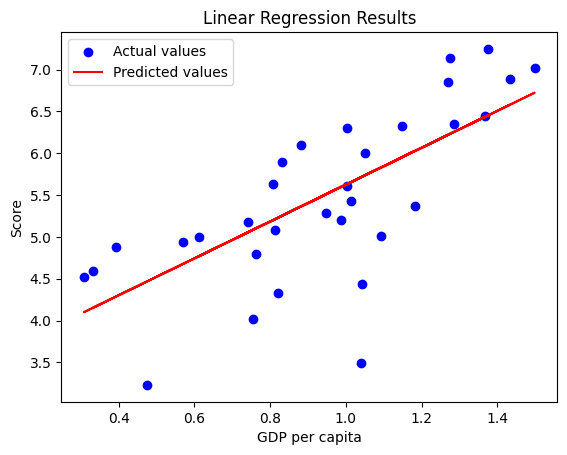

In [40]:
plt.scatter(X_test['GDP per capita'], y_test, color='blue', label='Actual values')
plt.plot(X_test['GDP per capita'], y_pred, color='red', label='Predicted values')
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.title('Linear Regression Results')
plt.legend()
plt.show()

## 3D

In [41]:

# Select two features and the target variable
X = data[['GDP per capita', 'Healthy life expectancy']]
y = data['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

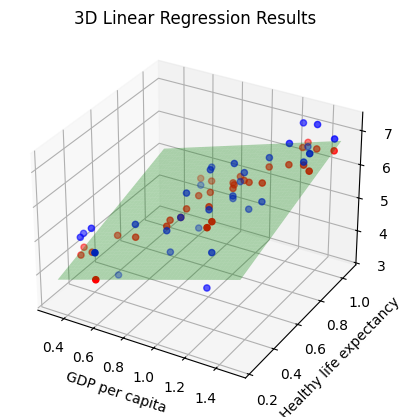

In [50]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the actual points
ax.scatter(X_test['GDP per capita'], X_test['Healthy life expectancy'], y_test, color='blue', label='Actual values')

# Plot the predicted points (surface)
ax.scatter(X_test['GDP per capita'], X_test['Healthy life expectancy'], y_pred, color='red', label='Predicted values')

# Labels and title
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Healthy life expectancy')
ax.set_zlabel('Score')
ax.set_title('3D Linear Regression Results')

# plt.legend()

# Create a grid to plot the plane
x_surf, y_surf = np.meshgrid(np.linspace(X_test['GDP per capita'].min(), X_test['GDP per capita'].max(), 100),
                             np.linspace(X_test['Healthy life expectancy'].min(), X_test['Healthy life expectancy'].max(), 100))

# Combine the grid points and convert them to a DataFrame with the same feature names as the training data
grid = np.c_[x_surf.ravel(), y_surf.ravel()]
grid_df = pd.DataFrame(grid, columns=['GDP per capita', 'Healthy life expectancy'])

# Predict on the grid points using the DataFrame
z_surf = model.predict(grid_df)

# Reshape to match the grid shape
z_surf = z_surf.reshape(x_surf.shape)

# Plot the surface
ax.plot_surface(x_surf, y_surf, z_surf, color='green', alpha=0.3);